# Proyecto Final 
- Brayan Alejandro Murillo González - 1007338060

# Aproximación numérica de la órbita de la Luna 

# Objetivos:

- Obtener el sistema de ecuaciones diferenciales que describen la trayectoria de la Luna al rededor de la tierra
- Resolver dicho sistema de ecuaciones diferenciales
- Obtener posicion y velocidad de la Luna en un tiempo determinado $t$
- Obtener la distancia máxima y mínima de la Luna respecto a la Tierra
- Obtener la velocidad máxima y mínima de la Luna en su orbita
- Obtener la Energía máxima de la Luna en su orbita
- Obtener las caracteristica de la orbita (semi-eje mayor, semi-eje menor, semi-distancia focal, excentricidad, periodo)
- Graficar:
    - posición en $x$ vs tiempo
    - posición en $y$ vs tiempo
    - posición en $x$ vs posición en $y$ en 2d y 3d
    - Magnitud de la distancia respecto a la tierra vs tiempo
    - Magnitud de la velocidad  vs tiempo
    - Energía vs Tiempo
- Hacer una simulación en vpython

# Desarrollo del problema

Consideremos la siguiente ilustración:

$M$ : Masa de la Tierra

$m$ : Masa de la Luna

$\vec{r}$ : Distancia de la luna a la Tierra


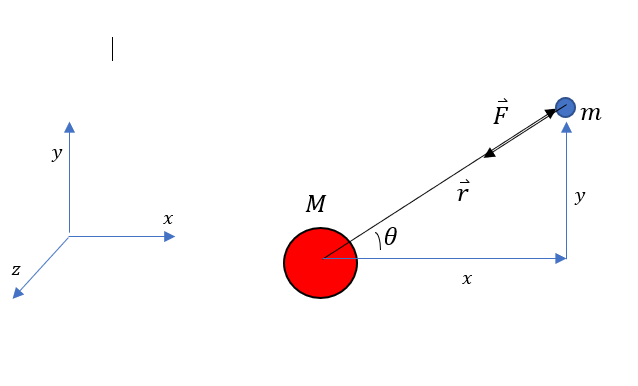


La Luna orbita la Tierra debido a la fuerza gravitacional presente entre estos dos cuerpos, para efectos prácticos solo vamos a considerar la fuerza que ejerce la Tierra sobre la luna, del mismo modo solo consideraremos las fuerzas en el eje $x$ y en el eje $y$.


La fuerza gravitacional que ejerce la Tierra sobre la Luna a partir de la segunda ley de Newton es :

$$ \vec{F} = \frac{-GMm}{r^2} \hat{r}\ \ \ \ (1)$$

Observando la ilustración se puede observar que :

$$ r = \sqrt{x^2+y^2} $$
$$ x = rcos\theta $$
$$ y = rsen\theta $$


La Fuerza tiene 2 componentes :

$$ F_x = -Fcos\theta\ \ \ \ (2)$$
$$ F_y = -Fsin\theta\ \ \ \ (3) $$

luego:

$$ cos\theta = \frac{x}{r}\ \ \ \ (4) $$

$$ sin\theta =\frac{y}{r} \ \ \ \ (5) $$

Reemplazando $(4)$ y $(5)$ en $(2)$ y $(3)$

$$ F_x = -F\frac{x}{r}\ \ \ \ (2)$$

$$ F_y = -F\frac{y}{r}\ \ \ \ (3) $$

Luego para la componente $x$: 

$$m\frac{dx^2}{dt^2}= -\frac{GMm}{r^2} \frac{x}{r}$$

$$\frac{dx^2}{dt^2}= -\frac{GM}{(x^2+y^2)^\frac{3}{2}}x\ \ \ \ (6) $$

Para la componente $y$: 

$$m\frac{dy^2}{dt^2}= -\frac{GMm}{r^2} \frac{y}{r}$$

$$\frac{dy^2}{dt^2}= -\frac{GM}{(x^2+y^2)^\frac{3}{2}}y\ \ \ \ (7)$$

A partir de las ecuaciones $(6)$ y $(7)$ podemos aproximar las posiciones y velocidades en las componentes $x$ , $y$ como sigue:

Para la componente x:  

$$\frac{dx}{dt} = v_x$$

$$\frac{dv_x}{dt}= -\frac{GM}{(x^2+y^2)^\frac{3}{2}}x\ \ \ \ (8)$$

Para la componente y:  

$$\frac{dy}{dt} = v_y$$

$$\frac{dv_y}{dt}= -\frac{GM}{(x^2+y^2)^\frac{3}{2}}y\ \ \ \ (9)$$


# Problema de valor inicial


Supondremos que la luna se encuentra en el punto mas alejado de la Tierra (apogeo) , la velocidad inicial será la velocidad que alcanza la luna en el apogeo esta velocidad solo tendra componente en $v_y$, por tanto las condiciones iniciales son:

$$ x_0 = a =404.467e6\ \ m $$

$$ v_{x_0}  = 0\ \ \frac{m}{s} $$

$$ y_0 = 0$$

$$ v_{y_0}  = 960\ \ \frac{m}{s} $$


Ademas de estos parametros iniciales, consideramos:

$ G = 6.67E-11 $   : Constante de gravitación universal

$M = 5.972E24\ \  kg$   : Masa de la Tierra

$m = 7.349e22\ \ kg$   : Masa de la Luna

$a = 406e6\ \ m $  : Semi eje mayor de la orbita de la Luna

$t= 27.32\ dias = 2360448\ segundos $  : Periodo orbital de la luna


En la siguiente ilustración se muestra el PVI:

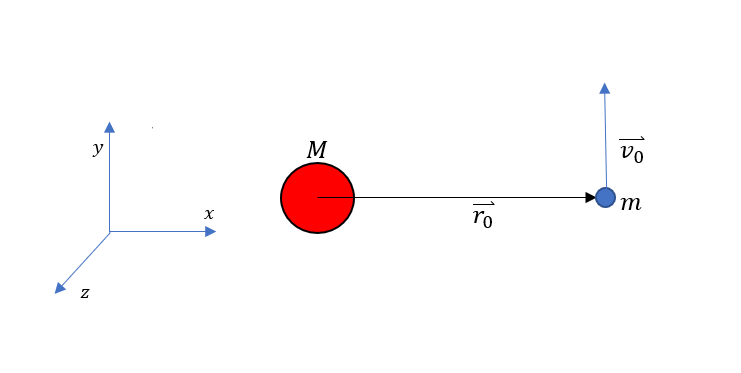

# Solución numérica del PVI, a partir de las ecuaciones $(8)$ y $(9)$ con odeint:

In [2]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.optimize as optimize
import scipy.interpolate as interpolate
from numpy.polynomial import Polynomial
from scipy.interpolate import interp1d
import sympy as sp
from mpl_toolkits.mplot3d import axes3d

In [3]:
G = 6.67E-11  # Constante de gravitación universal
M = 5.972E24  # Masa de la Tierra
m = 7.349e22  # Masa de la Luna
Dmax = 404.467e6    # Punto de la orbita mas alejado de la Tierra (apogeo)


In [4]:
"""Sistema de ecuaciones diferenciales con 4 ecuaciones para hallar componentes de posicion y velocidad en x e y"""

def eq(x,t,params):
    
    G = params[0]
    M = params[1]
    
    
    dxdt = x[2] # Expresión para la velocidad en x
    dydt = x[3] # Expresión para la velocidad en x
    
    dvxdt = (-G*M)*(x[0]/((x[0]**2+x[1]**2)**(3/2))) # Expresión para posición en x
    
    dvydt = (-G*M)*(x[1]/((x[0]**2+x[1]**2)**(3/2))) # Expresión para la posición en y
    
    return[dxdt,dydt,dvxdt,dvydt]

In [5]:

params = [G,M] # Parametros para la funcion eq

x0 = Dmax         # Posicion inicial en x
vx0 = 0        # Velocidad inicial en x

y0 = 0         # Posicion inicial en x
vy0 = 960    # Velocidad inicial en y

ci = [x0,y0,vx0,vy0] # Condiciones iniciales

t = np.linspace(0,2360448,100000) # tiempos de integración (su valor máximo es de 28 días convertidos a segundos)



In [6]:
pos = odeint(eq,ci,t,args = (params,)) # Solucion del sistema de Ecuaciones Diferenciales


In [7]:
posx = np.array(pos[:,0])  # Posiciones en x
posy = np.array(pos[:,1])  # Posiciones en y             

vx = np.array(pos[:,2])  # Velocidades en x
vy = np.array(pos[:,3])  # Velocidades en x


r = np.zeros([len(posx),2])  # Array para almacenar cada vector [x_i,y_i]
rmag =  np.zeros(len(posx))  # Array para almacenar la magnitud de cada vector [xi,yi]
v = np.zeros([len(vx),2])    # Array para almacenar cada vector [vx_i,vy_i]
vmag = np.zeros(len(vx))     # Array para almacenar la magnitud de cada vector [vx_i,vy_i]


for i in range(0,len(vx)):
    r[i] = [posx[i],posy[i]] # Vector posición componentes en x, y para cada instante de tiempo t
    rmag[i] = la.norm(r[i])   # magnitud de la posición para cada instante de tiempo t
    v[i] = [vx[i],vy[i]]     # Vectores velociadad con componentes en vx, vy en cada instante de tiempo t
    vmag[i] = la.norm(v[i])  # magnitudes de la velocidad en cada instante de tiempo t



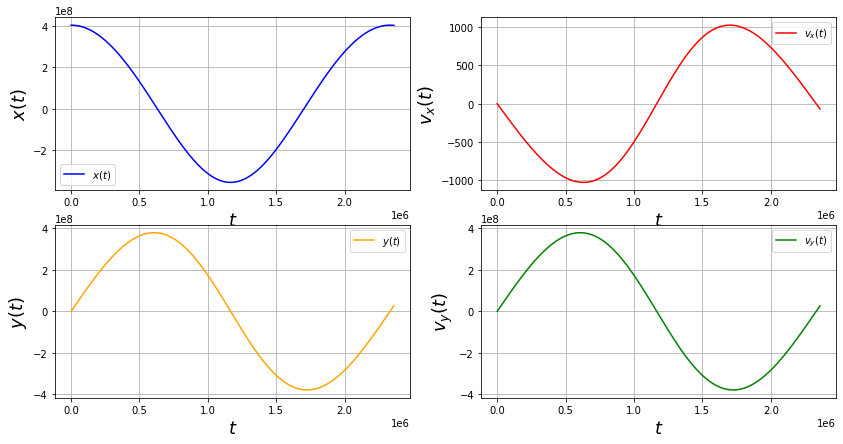

In [8]:

plt.figure(figsize=(14,7))


# Grafica de la posición x en función del tiempo
plt.subplot(221)
plt.plot(t,r[:,0],label='$x(t)$',color = "blue")
plt.xlabel("$t$",size=18)
plt.ylabel("$x(t)$",size=18)
plt.grid()
plt.legend()


# Grafica de la velocidad x en función del tiempo
plt.subplot(222)
plt.plot(t,v[:,0],label='$v_x(t)$',color = "red")
plt.xlabel("$t$",size=18)
plt.ylabel("$v_x(t)$",size=18)
plt.grid()
plt.legend()



# Grafica de la posición y en función del tiempo
plt.subplot(223)
plt.plot(t,r[:,1],label='$y(t)$', color = "orange")
plt.xlabel("$t$",size=18)
plt.ylabel("$y(t)$",size=18)
plt.grid()
plt.legend()


# Grafica de la velocidad y en función del tiempo
plt.subplot(224)
plt.plot(t,r[:,1],label='$v_y(t)$', color = "green")
plt.xlabel("$t$",size=18)
plt.ylabel("$v_y(t)$",size=18)
plt.grid()
plt.legend()

plt.show()


#plt.plot(0,0,"ro",label="Sun")

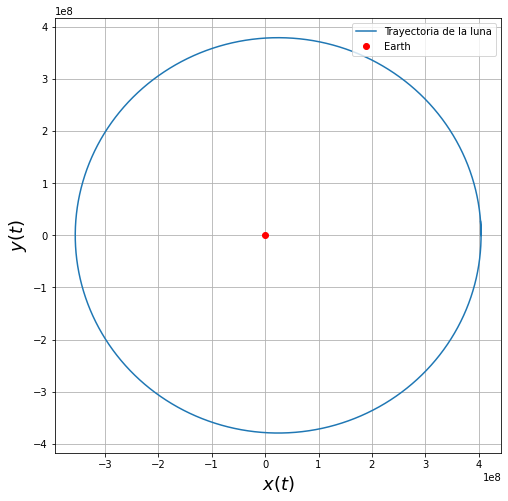

In [9]:
"""Grafica en 2D de la trayectoria de la Luna al rededor de la Tierra """

plt.figure(figsize=(8,8))
plt.plot(r[:,0],r[:,1], label = "Trayectoria de la luna")
plt.plot(0,0,"ro", label = "Earth")
plt.xlabel("$x(t)$",size=18)
plt.ylabel("$y(t)$",size=18)
plt.legend(loc='upper right')
plt.grid()
plt.show()



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


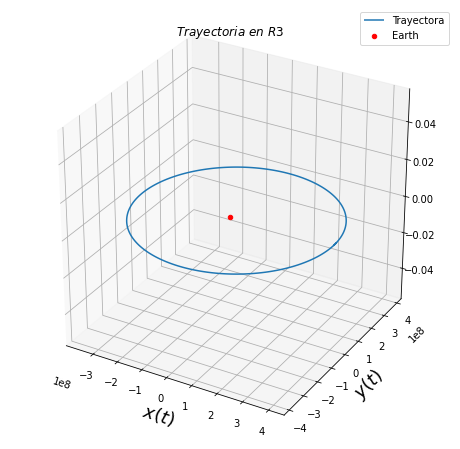

In [10]:
""" Grafica en 3D de la trayectoria de la Luna al rededor de la Tierra"""

# Creamos la figura
fig = plt.figure(figsize = (8,8))

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111 , projection = '3d')

# Datos en array bi-dimensional
x = np.array([r[:,0]])
y = np.array([r[:,1]])
z = np.array([np.zeros(len(r[:,0]))])



plt.xlabel("$x(t)$",size=18)
plt.ylabel("$y(t)$",size=18)
plt.title("$Trayectoria\ en\ R3$")


# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.plot_wireframe(x, y, z,label = "Trayectora")
ax1.scatter3D(0,0,0,color = "red",label = "Earth")
plt.legend()

# Mostramos el gráfico
plt.show()

# Distancia mínima (perigeo)

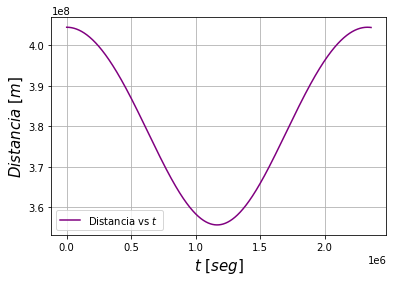

In [11]:
plt.plot(t,rmag,label="Distancia vs $t$",color="purple")

plt.legend()

plt.xlabel("$t\ [seg]$",size = 15)

plt.ylabel("$Distancia\ [m]$",size = 15)

plt.grid()

In [12]:
"""Rutina para hallar la distancia mínima y el tiempo en el que se alcanza"""

D_t = interpolate.interp1d(t,rmag) # Polinomio de interpolación para la distancia  en función del tiempo

t_Dmin = optimize.fminbound(D_t,0.5e6,max(t)) # Tiempo en el que se alcanza la distancia mínima 

Dmin = abs(D_t(t_Dmin)) # Distancia mínima 

print("La distancia mínima se alcanza a los: %.2E [seg]  y su valor es de: %.2E [m]"%(t_Dmin,Dmin))

La distancia mínima se alcanza a los: 1.17E+06 [seg]  y su valor es de: 3.56E+08 [m]


# Excentricidad de la orbita :

Conocidos el apogeo y el perigeo de la orbita, se puede determinar la excentricidad de la misma con la siguiente expresión :

$$ e = \frac{r_2-r_1}{r_2+r_1} $$

$r_1 : $ Perigeo (distancia minima a la tierra) 

$r_2 : $ Apogeo (distancia maxima a la tierra) 


In [13]:
r1 = Dmin  # Distancia mínima (perigeo)
r2 = Dmax  # Distancia máxima (apogeo)

e = (r2-r1)/(r2+r1) # Excentricidad
print(" La excentricidad de la orbita de la Luna es de aprox: %.3f" % e )

 La excentricidad de la orbita de la Luna es de aprox: 0.064


# Semi eje mayor y menor de la orbita

El semi eje mayor de la orbita puede ser calculado mediante la expresión: 

$$ a = \frac{r_2+r_1}{2}$$

El semi eje menor de la orbita puede ser calculado a partir del semi eje mayor $a$  y la semidistancia focal $c$

$$ c = \frac{r_2-r_1}{2}$$

$$ b = \sqrt{a^2-c^2}$$






In [14]:
a = (r2+r1)*0.5   # Semi eje mayor

c = (r2-r1)*0.5   # Semi-distancia focal

b = np.sqrt(a**2-c**2) # Semi-eje menor

print("El semi eje mayor de la orbita de la Luna es de: %.3f metros"%a)

print("El semi eje menor de la orbita de la Luna es de: %.3f metros"%b)

print("La semidistancia focal de la orbita de la Luna es de: %.3f metros"%c)

El semi eje mayor de la orbita de la Luna es de: 380064374.091 metros
El semi eje menor de la orbita de la Luna es de: 379280160.702 metros
La semidistancia focal de la orbita de la Luna es de: 24402625.909 metros


# Velocidad maxima en la orbita

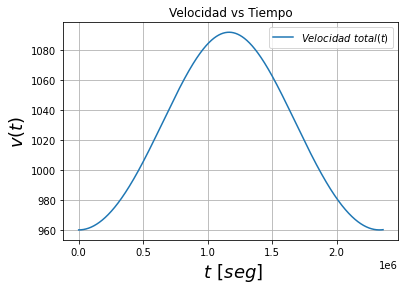

In [15]:
"""Grafica de la magnitud vs el tiempo"""

plt.plot(t , vmag , label = "$Velocidad\ total(t)$")

plt.xlabel(" $t\ [seg]$" , size = 18)

plt.ylabel("$v(t)$" , size = 18)

plt.title("Velocidad vs Tiempo")

plt.legend()
plt.grid()
plt.show()


In [16]:
"""Rutina para hallar la velocidad maxima y el tiempo en el que se alcanza"""

v_t = interpolate.interp1d(t,-vmag) # Polinomio de interpolación para la magnitud de la velocidad en función del tiempo

t_vmax = optimize.fminbound(v_t,0,max(t)) # Tiempo en el que se alcanza la velocidad maxima 

vmax = abs(v_t(t_vmax)) # Velocidad máxima

print("La velocidad máxima se alcanza a los: %.2E [Seg]  y su valor es de: %.2f [m/s]"%(t_vmax,vmax))


La velocidad máxima se alcanza a los: 1.17E+06 [Seg]  y su valor es de: 1091.73 [m/s]


# Energía total de el cuerpo en orbita  y su valor máximo

$$ E_{total}=\frac{1}{2}m(v_x^2+v_y^2)-\frac{GMm}{\sqrt{x^2+y^2}}$$

In [17]:
""" Función para calcular la energía total en cada punto de la trayectoria"""

def Etotal(x,y,vx,vy,M,m):
    
    Ek = 0.5*m*(vx**2+vy**2)**2
    
    Epg = G*M*m*(1/(x**2+y**2)**0.5)
    
    return Ek-Epg


In [18]:
E = Etotal(posx,posy,vx,vy,M,m) 

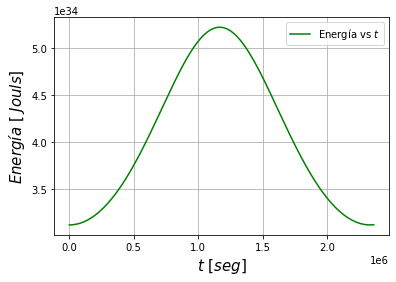

In [19]:
plt.plot(t,E,label="Energía vs $t$",color="green")

plt.legend()

plt.xlabel("$t\ [seg]$",size = 15)

plt.ylabel("$Energía\ [\ Jouls]$",size = 15)

plt.grid()

In [20]:
"""Rutina para hallar la Energía máxima y el tiempo en el que se alcanza"""

E_t = interpolate.interp1d(t,-E) # Polinomio de interpolación para la Energía total en función del tiempo

t_Emax = optimize.fminbound(E_t,0,max(t)) # Tiempo en el que se alcanza la Energía máxima 

Emax = abs(E_t(t_Emax)) # Energía máxima

print("La energía máxima se alcanza a los: %.2E [seg]  y su valor es de: %.2E [jouls]"%(t_Emax,Emax))

La energía máxima se alcanza a los: 1.17E+06 [seg]  y su valor es de: 5.22E+34 [jouls]


# Conclusiones

- La energía máxima y velocidad máxima se alcanzan en el punto mas cercano a la Tierra de la orbita (apogeo), esto es de esperarse ya que la energía depende de la velocidad, y a su vez la velocidad depende de la distancia ya que según las leyes de Kepler cuanto menor sea la distancia, mayor será la velocidad y por ende mayor será la energía.
- La orbita de la luna tiene una excentricidad muy baja (0,06 aprox), por tanto la trayectoria es casi circular.
- La energía maxima y velocidad máxima se alcanzan en la mitad del periodo de la órbita 1.17E6 segundos
- Se puede decir que la solucion de la trayectoria en x e y son funciones periódicas, tal vez de senos y cosenos, por la naturaleza de sus gráficas.
- El método de runge kuta 4 resulta eficaz para resolver sistemas de ecuaciones diferenciales acopladas como las de este problema
- Si tuviesemos en cuenta otros factores, como la inclinación de la orbita de la Luna, aparecerían fuerzas en $z$, y el modelo sería más preciso, para efectos ilustrativos, despreciar esta inclinación no aleja mucho los resultados de los resultados reales.


En el siguiente Dataframe se muestran los datos obtenidos en la solucion del problema:


In [21]:
# Data frame con los datos obtenidos en la solución del problema:

data = pd.DataFrame()

data["Datos"] = ["Distancia Máxima [m]","Distancia Minima [m]","Velocidad Máxima [m/s]",
                 "Velocidad Mínima [m/s]","Semi-eje mayor [m]","Semi-eje menor [m]","Semi-distancia focal [m]","Exentricidad"
                 ,"Energía Maxima [m]","Periodo [seg]"]


data["Valores"]=[Dmax,Dmin,vmax,vy0,a,b,c,e,Emax,max(t)]


data

,Datos,Valores
0,Distancia Máxima [m],4.044670e+08
1,Distancia Minima [m],3.556617e+08
2,Velocidad Máxima [m/s],1.091735e+03
3,Velocidad Mínima [m/s],9.600000e+02
4,Semi-eje mayor [m],3.800644e+08
5,Semi-eje menor [m],3.792802e+08
6,Semi-distancia focal [m],2.440263e+07
7,Exentricidad,6.420656e-02
8,Energía Maxima [m],5.219951e+34
9,Periodo [seg],2.360448e+06


In [23]:
# Valores reales ( fuente: https://ssd.jpl.nasa.gov/horizons/app.html#/ )
data_re = pd.DataFrame()

data_re["Datos"] = ["Distancia Máxima [m]","Distancia Minima [m]","Velocidad Máxima [m/s]",
                 "Velocidad Mínima [m/s]","Semi-eje mayor [m]","Excentricidad",
                 "Periodo [seg]"]


data_re["Valores"]=[4.055e8,3.636e8,1.04e3,9.4e3,3.84400e8,0.05490,2.32044e6]

data_re

,Datos,Valores
0,Distancia Máxima [m],4.055000e+08
1,Distancia Minima [m],3.636000e+08
2,Velocidad Máxima [m/s],1.040000e+03
3,Velocidad Mínima [m/s],9.400000e+03
4,Semi-eje mayor [m],3.844000e+08
5,Excentricidad,5.490000e-02
6,Periodo [seg],2.320440e+06


# Simulación de la trayectoria en Vpython

In [ ]:
# Importamos vpython

from vpython import * 
from __future__ import division, print_function



scene = canvas(title='Simulación de la trayectoria',width = 600, height=600,center=vector(0,0,0) ) # Creamos la escena

moon = sphere(pos = vector(Dmax,0,0),radius = 100000, color = color.white , make_trail=True) # Creamos una esfera para la luna

earth = sphere(pos = vector(0,0,0),radius = 10000000, color = color.blue)  # Creamos una esfera para la luna



ts = label(text = "Earth" , xoffset = 20 , yoffset = 50)  # etiqueta para la Tierra
 
ms = label(text = "Moon" , xoffset = 20 , yoffset = 50)   # Etiqueta para la Luna

rd = label(text = "" , xoffset = 20 , yoffset = -50 ,box = False) # Etiqueta para la magnitud de la distancia

vd = label(text = "" , xoffset = 20 , yoffset = -80 ,box = False) # Etiqueta de la magnitud de la velocidad

pg = label(text = "Perigeo" , xoffset = 20 , yoffset = 0 , pos = vector(-min(rmag),0,0) , box = False) # Etiqueta del perigeo

ag = label(text = "Apogeo" , xoffset = -20 , yoffset = 0 , pos = vector(Dmax,0,0) , box = False) # Etiqueta del apogeo



# Creamos el loop 

for i in range(0,len(t)):
    
    rate(3000) # Calculos por segundo
    
    moon.pos = vector(r[:,0][i] , r[:,1][i] , 0) # Posición de la luna para cada instante i
    
    earth.pos = vector(0,0,0)   # Posición de la Tierra para cada instante i
    
    ts.pos = earth.pos          # Posición de la etiqueta de la Tierra para cada instante i
    
    ms.pos = moon.pos           # Posición de la etiqueta de la Luna para cada instante i
    
    rstr = str(round(rmag[i]/1000,2))  # Convertimos el valor de distancia en un str
    
    vstr = str(round(vmag[i],2))       # Convertimos el valor de velocidad en un str
    
    rd.text = "r =" + rstr + "[km]"    # Etiqueta de la magnitud de la distancia en cada instante i
    
    rd.pos = moon.pos                # Posición de la etiqueta de la magnitud de la distancia en cada instante i
    
    vd.text = "v =" + vstr + "[m/s]"  # Etiqueta de la magnitud de la velocidad en cada instante i
    
    vd.pos = moon.pos          #Posición de la etiqueta de la magnitud de la velocidad en cada instante i

    


<IPython.core.display.Javascript object>

# Referencias

- Ecuaciones diferenciales y analisis del problema : http://www.sc.ehu.es/sbweb/fisica/celeste/kepler1/kepler1.htm

- Datos orbitales : https://ssd.jpl.nasa.gov/horizons/app.html#/

- Otras fuentes de consulta : 

    -https://en.wikipedia.org/wiki/Moon

    -https://en.wikipedia.org/wiki/Orbit_of_the_Moon
